In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load datasets and merge on by ID
survey_data = pd.read_csv('data/CSAT_Survey_Data.csv')
age_data = pd.read_csv('data/Customer_Age_Data.csv')
mrr_data = pd.read_csv('data/Customer_MRR_Data.csv')
revenue_data = pd.read_csv('data/Customer_Revenue_Data.csv')
ticket_data = pd.read_csv('data/Help_Ticket_Data.csv')
interaction_data = pd.read_csv('data/Newsletter_Interaction_Data.csv')
bugtask_data = pd.read_csv('data/Product_Bug_Task_Data.csv')
region_data = pd.read_csv('data/RegionAndVertical_Data.csv')
status_data = pd.read_csv('data/StatusAndLevel_Data.csv')

# change column name on age data
age_data.rename(columns={'CRM ID':'Customer ID','Customer Age (Months)':'Age'}, inplace=True)

# merge all datasets
df = pd.merge(survey_data, age_data, on='Customer ID')
df = pd.merge(df, mrr_data, on='Customer ID')
df = pd.merge(df, revenue_data, on='Customer ID')
df = pd.merge(df, ticket_data, on='Customer ID')
df = pd.merge(df, interaction_data, on='Customer ID')
df = pd.merge(df, bugtask_data, on='Customer ID')
df = pd.merge(df, region_data, on='Customer ID')
df = pd.merge(df, status_data, on='Customer ID')

df.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,...,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,...,"$732,199",30,366,3,160,Thailand,Retail,Marketplace,Retained,Enterprise
1,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,...,"$732,199",30,366,3,191,Thailand,Retail,Marketplace,Retained,Enterprise
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,...,"$732,199",30,366,3,119,Thailand,Retail,Marketplace,Retained,Enterprise
3,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,...,"$732,199",30,366,3,49,Thailand,Retail,Marketplace,Retained,Enterprise
4,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,...,"$732,199",30,366,3,151,Thailand,Retail,Marketplace,Retained,Enterprise


In [9]:
# analyze data
print(df.shape)
print(df.info())
print(df.describe())


(1745, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Customer ID                                                                1745 non-null   object 
 1   Year                                                                       1745 non-null   int64  
 2   Quarter                                                                    1745 non-null   int64  
 3   Survey Date                                                                1745 non-null   object 
 4   Response Date                                                              1745 non-null   object 
 5   How likely are you to recommend insider to a friend or colleague           1745 non-null   int64  
 6   How would you rate the value you gain from ou

In [12]:
# find null values
print(df.isnull().sum())

# drop null values
df.dropna(inplace=True)

Customer ID                                                                  0
Year                                                                         0
Quarter                                                                      0
Survey Date                                                                  0
Response Date                                                                0
How likely are you to recommend insider to a friend or colleague             0
How would you rate the value you gain from our company                       0
How frequently are you using our platform                                    0
Please rate the overall quality of our products                              0
Please rate the usability of the panel                                       0
Please rate your understanding of our reporting capabilities in the panel    0
Age                                                                          0
MRR                                                 

In [27]:
df.rename(columns={'How likely are you to recommend insider to a friend or colleague ': 'Recommendation',
                   'How would you rate the value you gain from our company': 'Value Rating',
                   'Please rate the overall quality of our products': 'Product Quality Rating',
                   'Please rate the usability of the panel': 'Panel Usability Rating',
                   'Please rate your understanding of our reporting capabilities in the panel': 'Reporting Understanding'}, inplace=True)
# get numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.describe()

,Year,Quarter,Recommendation,Value Rating,Product Quality Rating,Panel Usability Rating,Age,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count
count,1636.0,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,2022.0,2.138753,8.476773,4.327628,4.260391,4.088631,50.846577,48.604523,828.686430,6.071516,143.794010
std,0.0,0.823026,1.641234,0.739614,0.754628,0.875123,17.304513,68.741465,452.870745,7.868360,37.483465
min,2022.0,1.000000,1.000000,2.000000,0.000000,1.000000,10.000000,1.000000,12.000000,1.000000,9.000000
25%,2022.0,1.000000,8.000000,4.000000,4.000000,4.000000,39.000000,11.000000,545.000000,2.000000,117.000000
50%,2022.0,2.000000,9.000000,4.000000,4.000000,4.000000,54.000000,30.000000,766.000000,4.000000,150.000000
75%,2022.0,3.000000,10.000000,5.000000,5.000000,5.000000,68.000000,66.000000,1109.000000,6.000000,174.000000
max,2022.0,3.000000,10.000000,5.000000,5.000000,5.000000,72.000000,443.000000,3200.000000,54.000000,200.000000


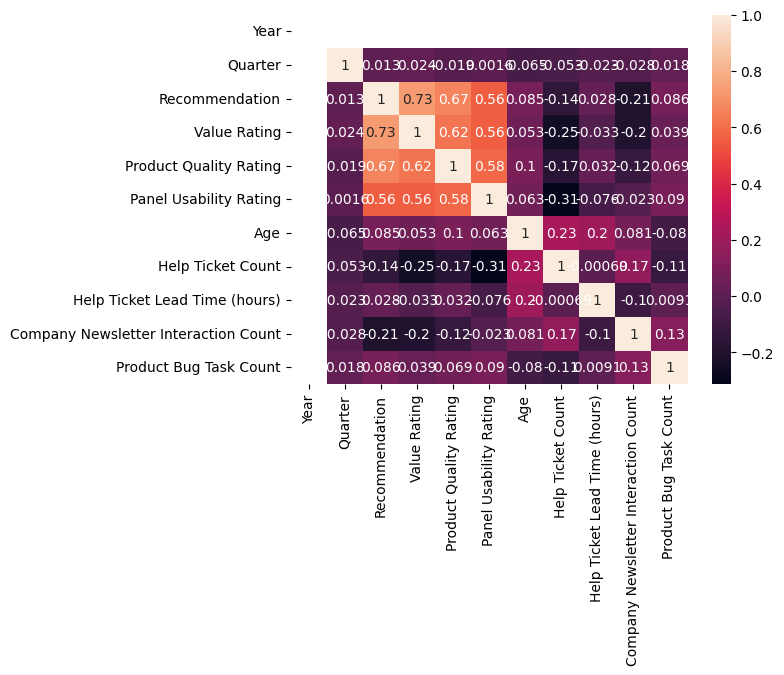

<Figure size 2000x800 with 0 Axes>

In [30]:
# correlation matrix 
mask = np.triu(df_num)
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True)
plt.figure(figsize=(20,8))
plt.show()
